In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# function for computing histogram manually
def compute_histogram(image):
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1
    return histogram

In [4]:
# function for getting the PDF of an image
def compute_pdf(original_histogram, total_pixels):
    pdf = original_histogram / total_pixels
    return pdf
  

In [5]:
# function for computing CDF from a normalized histogram
def compute_cdf(normalized_histogram):
    cdf = np.zeros(256)
    cdf[0] = normalized_histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + normalized_histogram[i]
    return cdf


In [6]:
# Histogram Equalization function
def histogram_equalization(channel_image):
  # First compute the histogram
  histogram = compute_histogram(channel_image)
  total_pixels = channel_image.shape[0] * channel_image.shape[1]
  
  # Now calculate the PDF
  pdf = compute_pdf(histogram, total_pixels)
  # Now calculate the CDF
  cdf = compute_cdf(pdf)
  
  # Now scale the CDF to [0, 255]
  cdf_scaled = np.round(cdf * 255).astype(np.uint8)
  
  equalized_channel_image = cdf_scaled[channel_image]
  
  return equalized_channel_image,histogram,pdf,cdf
  

In [7]:
def plot_hist_pdf_cdf(hist, pdf, cdf, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.bar(range(256), hist, color='gray')
    plt.title(f"{title} Histogram")

    plt.subplot(1,3,2)
    plt.plot(pdf, color='blue')
    plt.title(f"{title} PDF")

    plt.subplot(1,3,3)
    plt.plot(cdf, color='red')
    plt.title(f"{title} CDF")

    plt.tight_layout()
    plt.show()

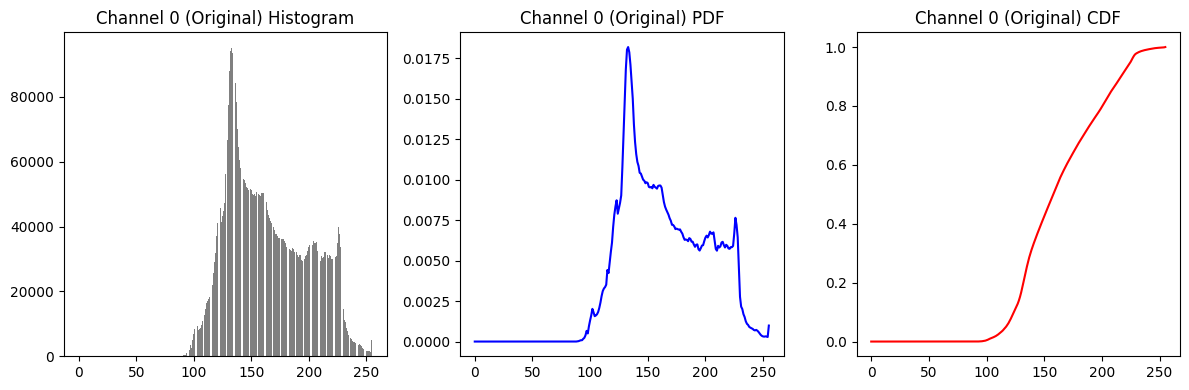

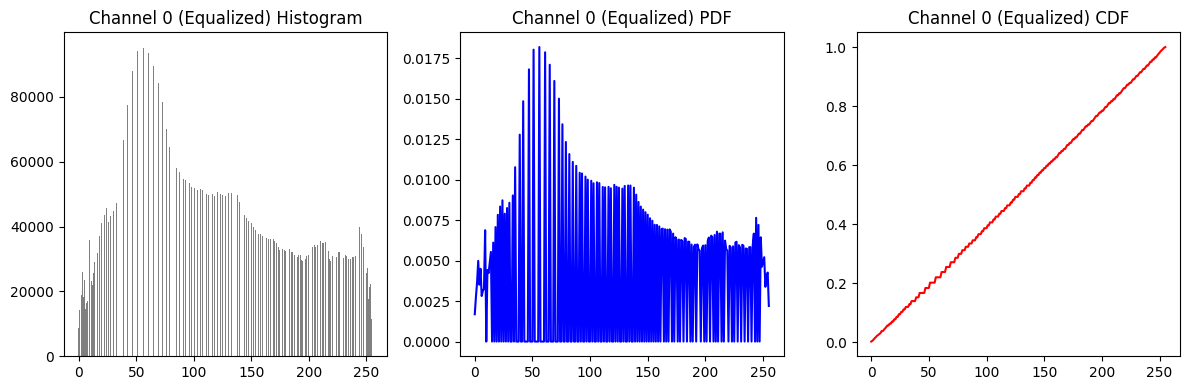

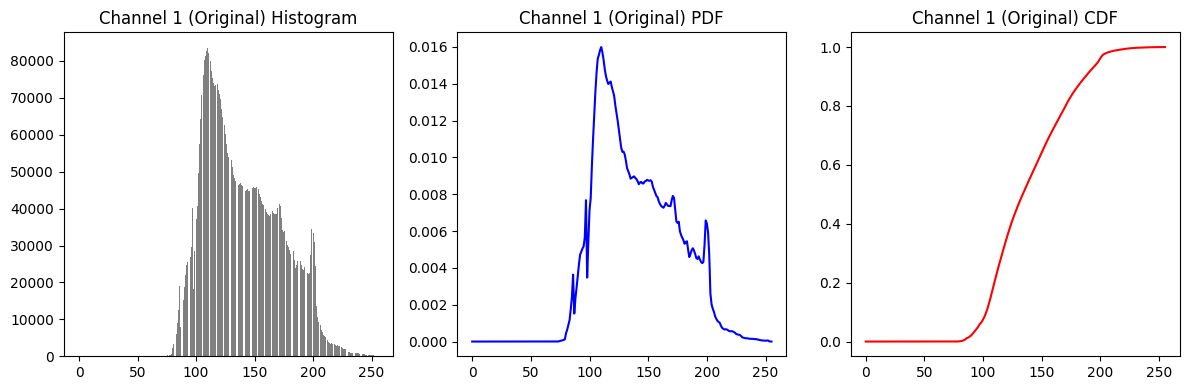

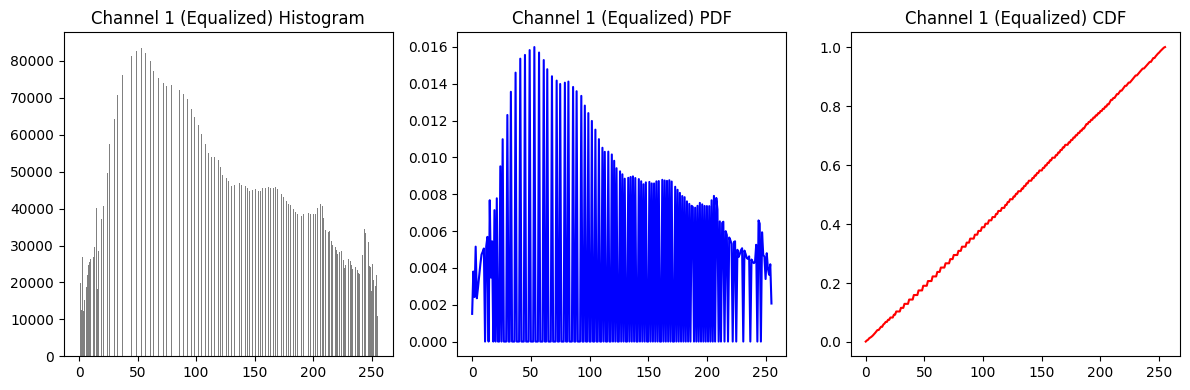

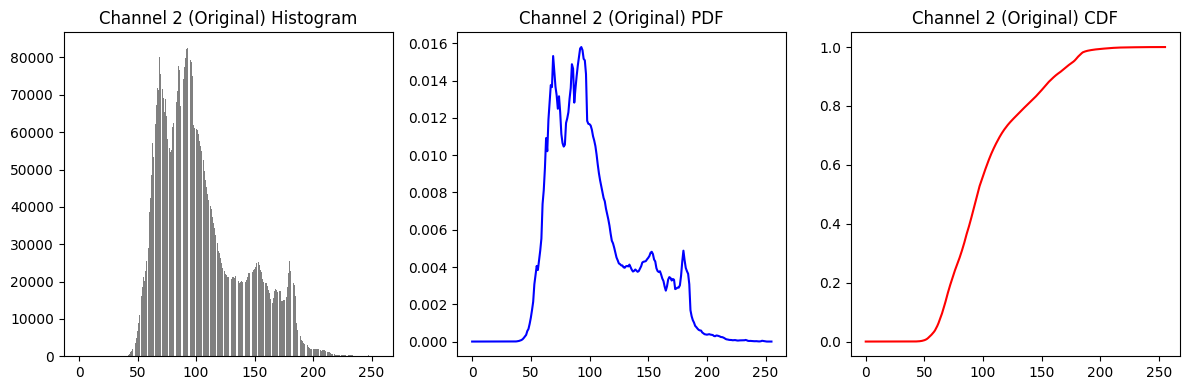

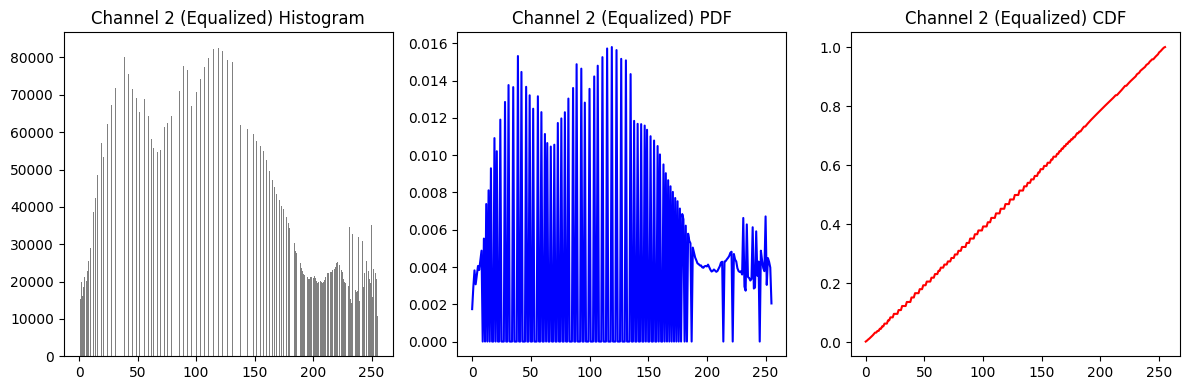

In [8]:
# Reading the image in (BGR) color mode
original_image = cv2.imread("../../data/landscape2.jpeg",cv2.IMREAD_COLOR)

# Now converting the image to RGB color space from BGR
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Now split each channel
channels = cv2.split(original_image)
equalized_channels = []

for i,ch in enumerate(channels):
  eq_ch, hist, pdf, cdf = histogram_equalization(ch)
  equalized_channels.append(eq_ch)
  plot_hist_pdf_cdf(hist, pdf, cdf, f"Channel {i} (Original)")
  eq_hist = compute_histogram(eq_ch)
  eq_pdf = compute_pdf(eq_hist, ch.size)
  eq_cdf = compute_cdf(eq_pdf)
  
  plot_hist_pdf_cdf(eq_hist, eq_pdf, eq_cdf, f"Channel {i} (Equalized)")
  
rgb_equalized = cv2.merge(equalized_channels)
  
  



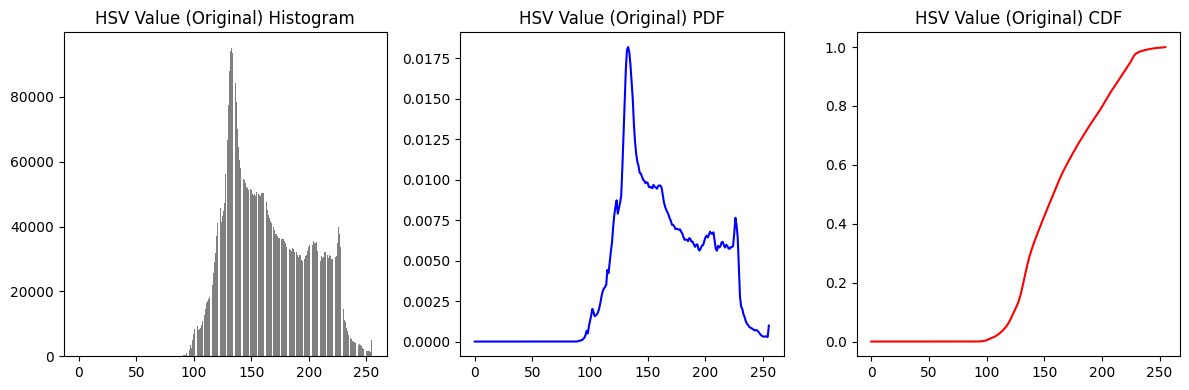

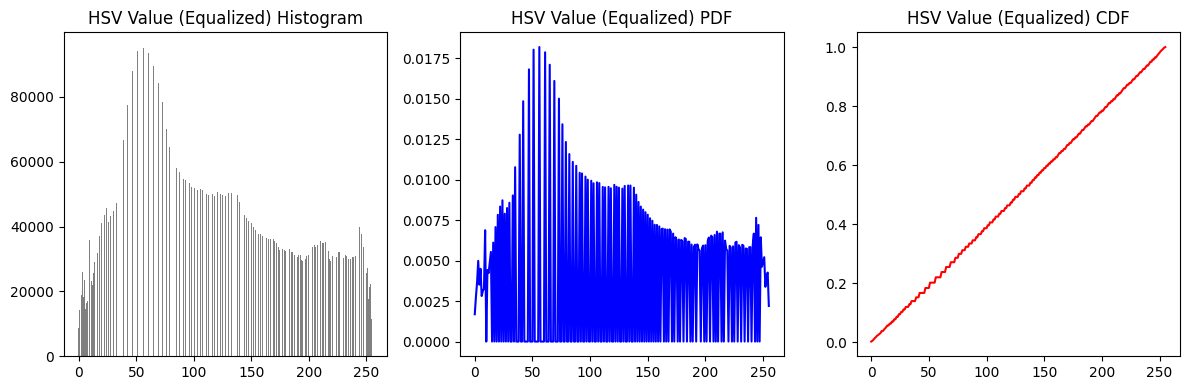

In [9]:
hsv_img = cv2.cvtColor(original_image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)

v_eq, v_hist, v_pdf, v_cdf = histogram_equalization(v)
plot_hist_pdf_cdf(v_hist, v_pdf, v_cdf, "HSV Value (Original)")
v_eq_hist = compute_histogram(v_eq)
v_eq_pdf = compute_pdf(v_eq_hist, v.size)
v_eq_cdf = compute_cdf(v_eq_pdf)
plot_hist_pdf_cdf(v_eq_hist, v_eq_pdf, v_eq_cdf, "HSV Value (Equalized)")

hsv_equalized = cv2.merge([h, s, v_eq])
hsv_equalized = cv2.cvtColor(hsv_equalized, cv2.COLOR_HSV2RGB)

Text(0.5, 1.0, 'HSV Equalized')

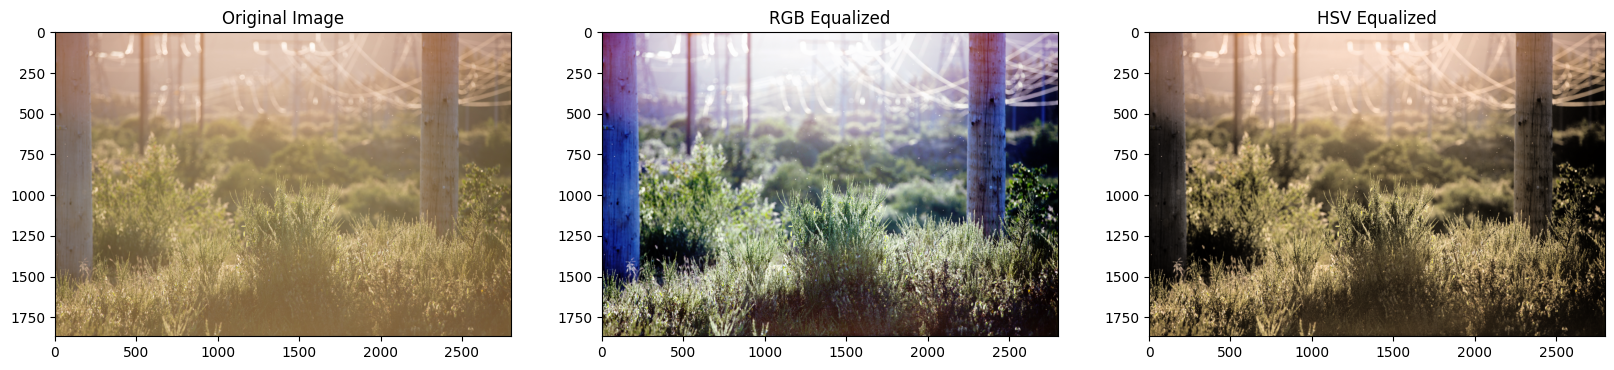

In [11]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(3,3,2)
plt.imshow(rgb_equalized)
plt.title("RGB Equalized")

plt.subplot(3,3,3)
plt.imshow(hsv_equalized)
plt.title("HSV Equalized")